# Final Project
## Vanessa Wu
### 12/05/2023

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Q1
s = pd.read_csv("social_media_usage.csv")
s.shape

(1502, 89)

In [3]:
#Q2
def clean_sm(x):
    return np.where(x == 1, 1, 0)

_ = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 1, 6]
})
_.apply(clean_sm)

,A,B
0,1,0
1,0,1
2,0,0


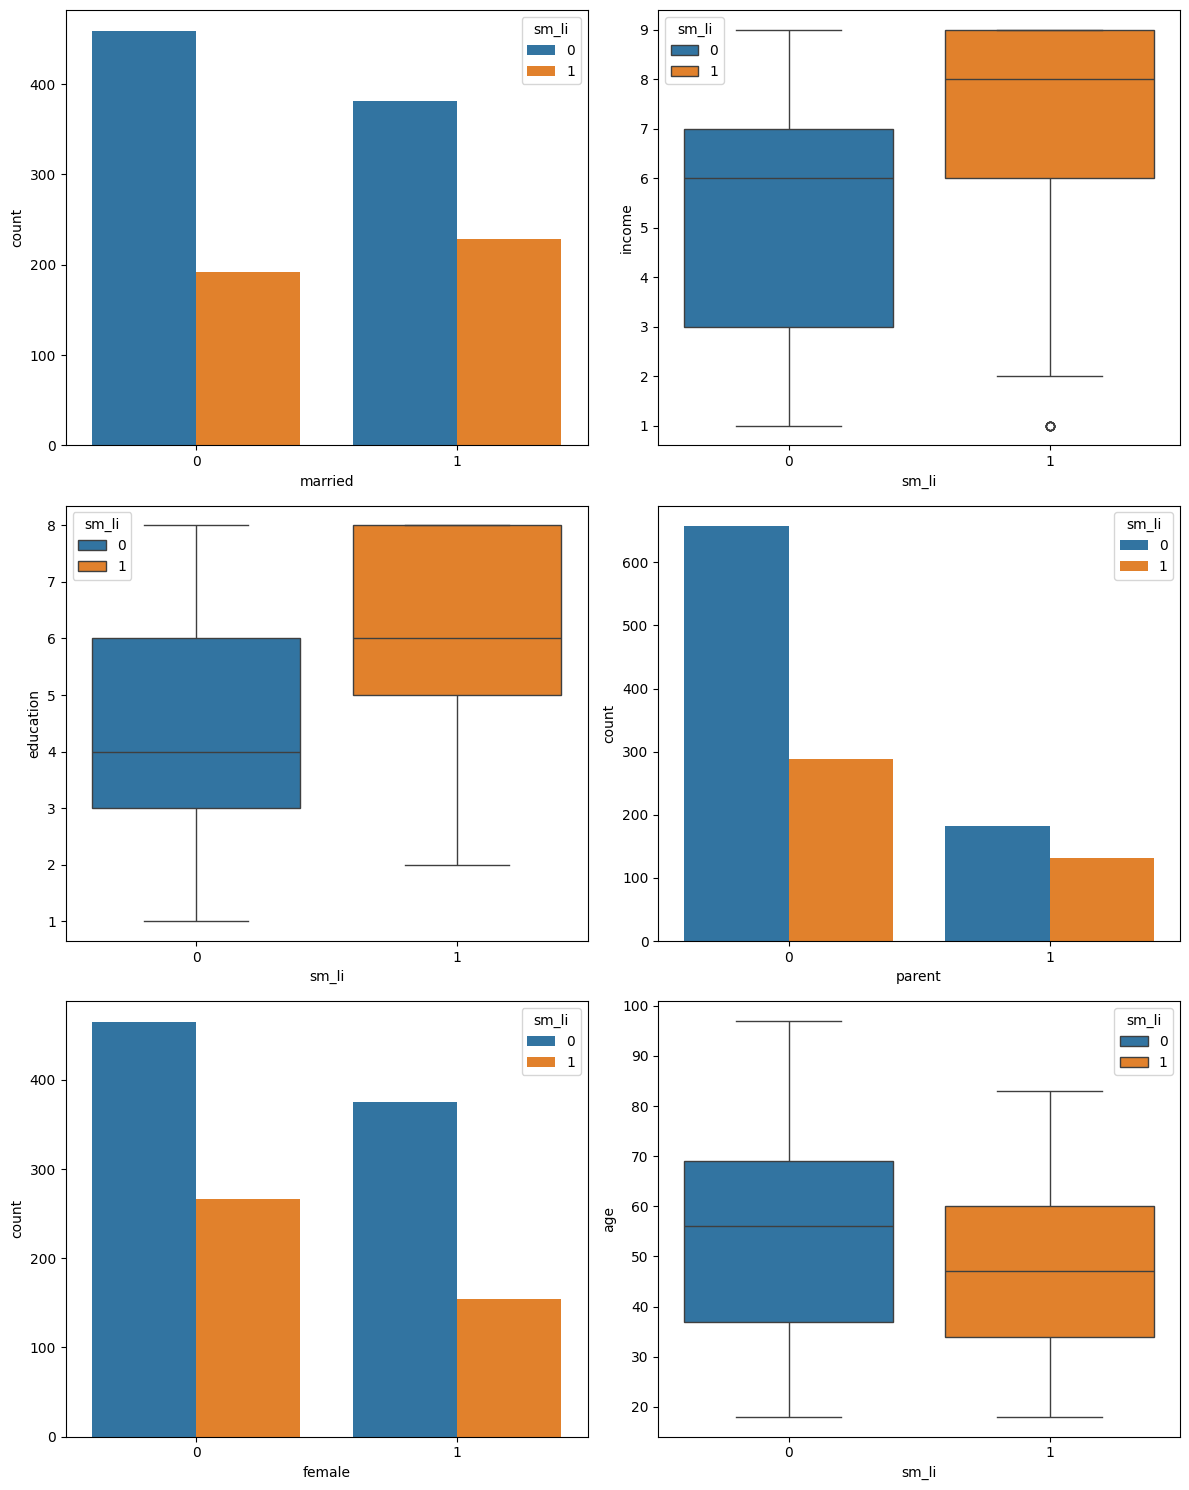

In [4]:
#Q3
ss = pd.DataFrame()

# Applying the clean_sm function to the 'web1h' and 'marital' columns
ss['sm_li'] = clean_sm(s['web1h'])
ss['married'] = clean_sm(s['marital'])
ss['parent'] = clean_sm(s['par'])
ss['income'] = s['income'].apply(lambda x: x if x <= 9 else np.nan)
ss['education'] = s['educ2'].apply(lambda x: x if x <= 8 else np.nan)
ss['female'] = s['gender'].apply(lambda x: 1 if x == 2 else 0)
ss['age'] = s['age'].apply(lambda x: x if x <= 98 else np.nan)

# Dropping missing values
ss.dropna(inplace=True)

# Exploratory Data Analysis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# List of feature variables
features = ['married', 'income', 'education', 'parent', 'female', 'age']

# Plotting each feature
for i, feature in enumerate(features):
    if feature in ["married", "parent", "female"]:
        # For binary features, use count plot
        sns.countplot(x=feature, hue='sm_li', data=ss, ax=axes[i//2, i%2])
    else:
        # For continuous or ordinal features, use box plot
        sns.boxplot(x='sm_li', hue='sm_li', y=feature, data=ss, ax=axes[i//2, i%2])

# Adjusting layout
plt.tight_layout()
plt.show()

In [5]:
#Q4
y = ss['sm_li']
X = ss.drop('sm_li', axis=1)

In [6]:
#Q5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1008, 6), (252, 6), (1008,), (252,))

X_train and y_train are used for training the model, and X_test and y_test are used to evaluate its performance. 

In machine learning, we want to have one set of data to train the model and the other set of data that the model has never seen to test the model's performance on new data. This is crucial for assessing its real-world applicability.

In [7]:
#Q6
logi_model = LogisticRegression(class_weight='balanced')

# Fit the model with the training data
logi_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [8]:
#Q7
y_pred = logi_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix

(0.6746031746031746,
 array([[120,  53],
        [ 29,  50]], dtype=int64))

The accuracy of the logistic regression model on the test data is 67.46%

The confusion matrix has four numbers:
1. **True Negative** (120): The model correctly predicted 120 cases where individuals do not use LinkedIn
2. **False Positive** (53): The model incorrectly predicted 53 cases as LinkedIn users
3. **False Negative** (29): The model incorrectly predicted 29 cases as non-LinkedIn users
4. **True Positive** (50): The model correctly predicted 50 cases where individuals use LinkedIn.

In [10]:
#Q8
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=["Predicted Non-User", "Predicted User"],
                              index=["Actual Non-User", "Actual User"])

conf_matrix_df

,Predicted Non-User,Predicted User
Actual Non-User,120,53
Actual User,29,50


In [12]:
50/79

0.6329113924050633

Q9

1. Precision = $\frac{TP}{TP+FP} = \frac{50}{50+53} = 0.49$

Precision can be a preferred metric when the cost of a false positive is high. For example, in email spam detection, a high precision means fewer non-spam emails are incorrectly classified as spam.

2. Recall = $\frac{TP}{TP+FN} = \frac{50}{50+29} = 0.63$

Recall can be a preferred metric in medical diagnostics for a serious disease, it's better to identify as many cases of the disease as possible.

3. F1 Score = $2\frac{Precision*Recall}{Precision+Recall} = 0.55$

This metric is useful when we want a balance between Precision and Recall, especially if there's an uneven class distribution. For example, in fraud detection, fraud rate may be low, using f1 socre will balance the need to catch fraudulent cases against the importance of not falsely labeling non-fraudulent transactions as fraud.



In [15]:
TP, FP, FN, TN = 50, 53, 29, 120

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
precision, recall, f1_score

(0.4854368932038835, 0.6329113924050633, 0.5494505494505495)

In [16]:
X

,married,parent,income,education,female,age
0,0,0,6.0,4.0,1,77.0
1,0,0,5.0,3.0,0,59.0
2,1,0,8.0,4.0,1,60.0
3,0,0,8.0,8.0,0,73.0
4,1,0,7.0,8.0,1,65.0
...,...,...,...,...,...,...
1497,1,1,6.0,4.0,0,41.0
1498,0,0,2.0,5.0,0,46.0
1499,0,0,7.0,3.0,0,18.0
1500,0,0,4.0,3.0,1,23.0


In [18]:
#Q10
example_1 = pd.DataFrame([[1, 0, 8, 7, 1, 42]], columns=X.columns)
example_2 = pd.DataFrame([[1, 0, 8, 7, 1, 82]], columns=X.columns)

# Making predictions
prob_1 = logi_model.predict_proba(example_1)[0][1]  # Probability for 42 years old
prob_2 = logi_model.predict_proba(example_2)[0][1]  # Probability for 82 years old

prob_1, prob_2

(0.701046247597465, 0.4276038750526465)